In [1]:
ENV["PYTHONPATH"] = "/home/gridsan/aligho/.local/lib/python3.8/site-packages/PyNormaliz-2.15-py3.8-linux-x86_64.egg";
D = 2;
using HDF5, PyPlot
using DelimitedFiles, PyPlot, LinearAlgebra, JLD2, PyCall, StaticArrays, Statistics
using Crystalline, Brillouin, MPBUtils, SymmetryBases
using Crystalline: TEST_αβγs, TEST_αβγ, dot, norm
using Crystalline: normscale, matching_littlegroups
using Crystalline: AbstractFourierLattice
topology_paper_dir = "../../TopologyPaper/"
include(topology_paper_dir * "get-freqs-symeigs.jl")
include(topology_paper_dir * "symeigs-from-io.jl");
include("../../Topology_ML/Phc_ML/fft.jl")
include("../get_uc_coefs.jl");
np = pyimport("numpy");

In [2]:
N = 64
xs = ys = np.linspace(-0.5, 0.5, N, endpoint=false)
xs = np.repeat(np.reshape(xs, (1, N)), N, axis=0);
ys = np.repeat(np.reshape(ys, (N, 1)), N, axis=1);
Gs = [[-1, 0], [0, -1], [-1, -1], [-1, 1], [-2, 0], [0, -2], [-2, -1], [-2, 1], [-1, -2]];

In [3]:
function smooth(X)
    Xprime = X
    epsilon_grid = zeros((N, N))
    for (CG, (Gx, Gy)) in zip(Xprime, Gs)
        epsilon_grid += CG*cos.(2*pi*xs*Gy + 2*pi*ys*Gx)
    end
    return epsilon_grid
end;

In [4]:
wps = ["1a", "1b", "1c", "1d"]
wps2 = ["1a", "1c", "1b", "1d"] # switch 1b and 1c due to convention of how Gvectors are stored
nGs = 10
gidxs = [1, 2, 3, 4]
symmetry_data = np.zeros(10000 * length(gidxs) * length(wps))
input_data = np.zeros((10000 * length(gidxs) * length(wps), nGs));

In [5]:
file = h5open("./sg2-data.h5", "r");

In [6]:
cgs = file["sg2/9375/epsilon_Gs-gidx=1"][2:end];

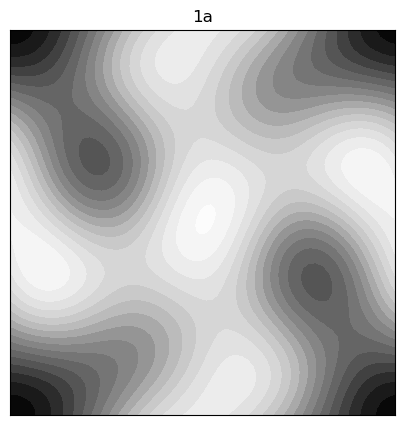

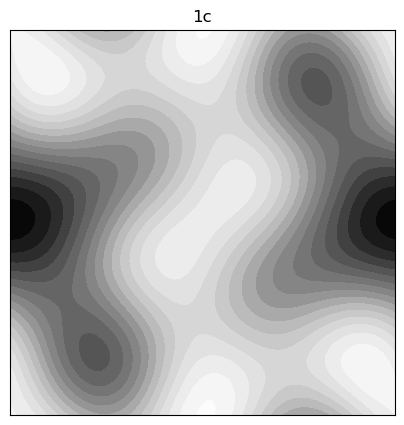

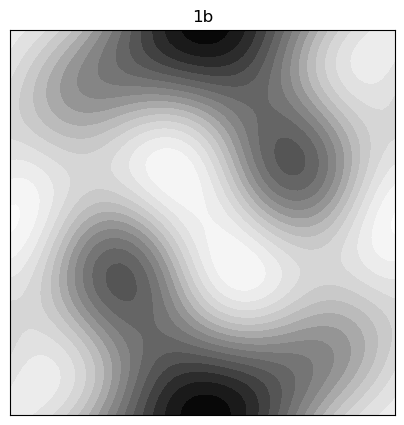

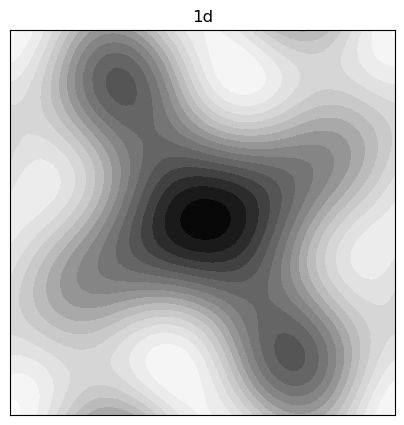

In [7]:
for (wp1, wp2) in zip(wps, wps2)
    figure(figsize=(5, 5))
    sym_vec_phases = file["sg2/symmetry_vector_phases/$(wp1)"][]
    epsilon_G_phases = real(file["sg2/epsilon_G_phases/$(wp2)"][])
    contourf(xs, ys, smooth(cgs .* epsilon_G_phases[2:end]), cmap="Greys", origin="lower", levels=20)
    title(wp2)
    gca().set_aspect("equal")
    #savefig("./figures/data_augmentation-$(wp2).pdf")
    #imshow(smooth(cgs .* epsilon_G_phases[2:end]), cmap="Greys", origin="lower")
    xticks([])
    yticks([])
end

In [8]:
cgs = file["sg2/9375/epsilon_Gs-gidx=1"][2:end];

In [9]:
cgs1 = [cgs[1], zeros(8)...]
cgs2 = [0, cgs[2], zeros(7)...]
cgs3 = [0, 0, cgs[3], zeros(6)...];

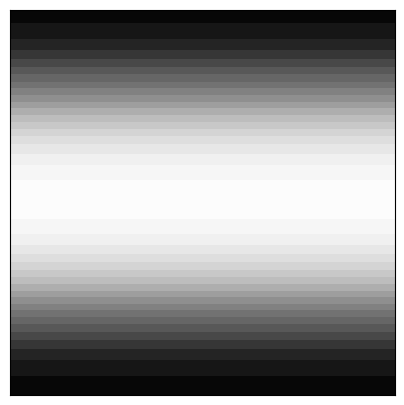

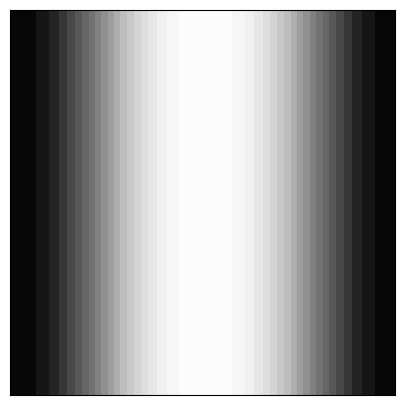

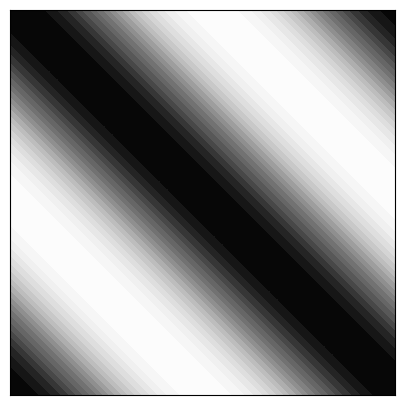

In [10]:
for (i, cgsi) in enumerate([cgs1, cgs2, cgs3])
    figure(figsize=(5, 5))
    wp1 = wp2 = "1a"
    sym_vec_phases = file["sg2/symmetry_vector_phases/$(wp1)"][]
    epsilon_G_phases = real(file["sg2/epsilon_G_phases/$(wp2)"][])
    contourf(xs, ys, smooth(cgsi .* epsilon_G_phases[2:end]), cmap="Greys", origin="lower", levels=20)
    gca().set_aspect("equal")
    xticks([])
    yticks([])
    #savefig("./figures/data_augmentation-fourier$(i).pdf")
end